In [1]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import dask.dataframe as dd
from tqdm import tqdm
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

In [3]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#pd.set_option('display.max_colwidth', None)

In [4]:
using_collab = True

if using_collab :
  from google.colab import drive
  drive.mount('/content/drive')

file_path = "/content/drive/MyDrive" #file_path를 설정해주세요.

Mounted at /content/drive


In [5]:
df = pd.read_excel(file_path+"/KISTI/rawdata/상품정보 품목 등록 내역_제품특성정보소개추가.xlsx")

In [6]:
df

,물품분류번호,품명,세부품명번호,물품식별번호,물품규격명,물품제조사명,등록일시,물품이미지URL,제품특성정보소개
0,44111911,인터랙티브화이트보드,4411191101,22785237,"인터랙티브화이트보드, 한국크레아, HCB-T22W, 54.6cm, 전자유도방식/전자...",주식회사 한국크레아,2022-06-01 10:32:00,https://img.g2b.go.kr:7073/Resource/CataAttach...,"구성품: 교탁함체, 54.6cm판서모니터, 판서프로그램"
1,44111911,인터랙티브화이트보드,4411191101,22785238,"인터랙티브화이트보드, 한국크레아, HCB-22TW, 54.6cm, 전자유도방식/전자...",주식회사 한국크레아,2022-06-01 10:32:00,https://img.g2b.go.kr:7073/Resource/CataAttach...,"구성품: 교탁함체, 54.6cm판서모니터, 컨트롤러, 구즈넥마이크, 판서프로그램,"
2,44111911,인터랙티브화이트보드,4411191101,22785239,"인터랙티브화이트보드, 한국크레아, HKC-TMTWCREA, 54.6cm, 전자유도방...",주식회사 한국크레아,2022-06-01 10:32:00,https://img.g2b.go.kr:7073/Resource/CataAttach...,"구성품: 교탁함체, 54.6cm판서모니터, 컨트롤러,앰프내장형, 구즈넥마이크, 판서..."
3,44111911,인터랙티브화이트보드,4411191101,22785240,"인터랙티브화이트보드, 한국크레아, HCB-T22WE, 54.6cm, 전자유도방식/전...",주식회사 한국크레아,2022-06-01 10:32:00,https://img.g2b.go.kr:7073/Resource/CataAttach...,"구성품: 교탁함체, 54.6cm판서모니터, 앰프내장형, 구즈넥마이크, 판서프로그램,"
4,44111911,인터랙티브화이트보드,4411191101,22948501,"인터랙티브화이트보드, 한국크레아, HCD-T22WEA, 54.6cm, 전자유도방식/...",주식회사 한국크레아,2022-06-01 10:32:00,https://img.g2b.go.kr:7073/Resource/CataAttach...,"구성품: 좌탁함체, 54.6cm판서모니터, 통합컨트롤러, 구즈넥마이크, 판서프로그램"
...,...,...,...,...,...,...,...,...,...
2237,30151899,합성고분자방수시트,3015189901,24008489,"합성고분자방수시트, 정희, JH-PP-05, 1000×1000×t1.5mm",주식회사 정희,2022-06-02 15:18:51,https://img.g2b.go.kr:7073/Resource/CataAttach...,"라이닝 시공용 방수시트(PP)는 항균제를 함유한 방수시트의 사용으로, 대장균 황생포..."
2238,30151899,합성고분자방수시트,3015189901,24008490,"합성고분자방수시트, 정희, JH-PP-06, 1000×1000×t2mm",주식회사 정희,2022-06-02 15:18:51,https://img.g2b.go.kr:7073/Resource/CataAttach...,"라이닝 시공용 방수시트(PP)는 항균제를 함유한 방수시트의 사용으로, 대장균 황생포..."
2239,30151599,특수지붕재,3015159901,24065814,"특수지붕재, 에이비엠, ABM-AGP-PR220, t0.6mm, 글라스울220mm",주식회사 에이비엠,2022-06-02 18:16:39,https://img.g2b.go.kr:7073/Resource/CataAttach...,열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...
2240,30151599,특수지붕재,3015159901,24065815,"특수지붕재, 에이비엠, ABM-AGP-PR180, t0.6mm, 글라스울180mm",주식회사 에이비엠,2022-06-02 18:16:39,https://img.g2b.go.kr:7073/Resource/CataAttach...,열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...


In [7]:
text = df.iloc[16]["제품특성정보소개"]

In [8]:
def word_filtering(text):
    stop_words='\n *'
    stop_words = set(stop_words.split(' '))

    tmp = ""
    words_tokens = word_tokenize(text)
    for w in words_tokens:
        if w not in stop_words:
            if w == '.':
                tmp = f'{tmp[:-1]}, '
            else:
                tmp += f'{w} '
    if tmp[-2] == ',':
        tmp = f'{tmp[:-2]}.'
    else:
        tmp = tmp[:-1]
    return tmp

In [9]:
#word_filtering(text)

In [10]:
df = df[['품명', '물품규격명', '제품특성정보소개']]

In [11]:
df.sample(5)

,품명,물품규격명,제품특성정보소개
314,스틸그레이팅,"스틸그레이팅, 석천스틸그레이팅, sc0344, 1190×1390×100×9mm, 뚜껑","주,부재가 격자 모양으로 연결 고정되어 이상적인 형태의 구조를 형성하고 있어 경량이..."
753,교량받침,"교량받침, 매크로드, EBC1750-132-F, 300×500×132mm, 1750...",탄성받침은 고무와 보강판의 적층으로 이루어져 있음. 교량구조물의 상부구조에 작용하는...
1351,교량받침,"교량받침, 매크로드, FRB-4300-94-G, 600×600×t94mm, 4300...",교량의 상부구조물과 하부구조물의 사이에 설치되어 상부구조물에 작용하는 하중을 하부구...
956,교량받침,"교량받침, 매크로드, EBC6000-203-G, 700×700×203mm, 6000...",탄성받침은 고무와 보강판의 적층으로 이루어져 있음. 교량구조물의 상부구조에 작용하는...
73,금속돌망태,"금속돌망태, 미광철망, MKJ-21, 1000×1500×1000mm, 아연도금철선5...",특수 아연도금 철선으로 중복되게 꼬아서 육형으로 만든 Mesh의 구조를 육면체 형태...


In [12]:
df.tail(3)

,품명,물품규격명,제품특성정보소개
2239,특수지붕재,"특수지붕재, 에이비엠, ABM-AGP-PR220, t0.6mm, 글라스울220mm",열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...
2240,특수지붕재,"특수지붕재, 에이비엠, ABM-AGP-PR180, t0.6mm, 글라스울180mm",열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...
2241,특수지붕재,"특수지붕재, 에이비엠, ABM-AGP-PR130, t0.6mm, 글라스울130mm",열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...


In [13]:
df_tmp = df.tail(3)

In [14]:
df_tmp["물품규격명"] = df_tmp["물품규격명"].map(lambda x : ",".join(x.split(',')[1:])[1:])

<ipython-input-14-f0f2f2a51aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["물품규격명"] = df_tmp["물품규격명"].map(lambda x : ",".join(x.split(',')[1:])[1:])


In [15]:
df_tmp[["품명", "제품특성정보소개", "물품규격명"]]

,품명,제품특성정보소개,물품규격명
2239,특수지붕재,열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...,"에이비엠, ABM-AGP-PR220, t0.6mm, 글라스울220mm"
2240,특수지붕재,열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...,"에이비엠, ABM-AGP-PR180, t0.6mm, 글라스울180mm"
2241,특수지붕재,열교 차단 포스트 및 기능성 레일이 구비된 금속 지붕패널로 열교 차단을 통한 단열성...,"에이비엠, ABM-AGP-PR130, t0.6mm, 글라스울130mm"


In [16]:
pro_count = dict(zip(range(len(list(df[["품명","물품규격명"]].groupby(by=["품명"]).count().sort_values(by="물품규격명").index))), list(df[["품명","물품규격명"]].groupby(by=["품명"]).count().sort_values(by="물품규격명").values[:,0])))

In [17]:
df_tmp = df.loc[df["제품특성정보소개"]=="황토포장은 천연황토를 건조 고순도 분말화한 황토를 사용하여 제조하며 환경 친화적이고 색상을 천연 황토색으로 재현하여 이용자의 건강에 도움이 되는 훌륭한 소재로써 주용도는 산책로, 자전거 도로, 보도, 주차장, 문화재 보존지역등  경관 고려지역 포장재임."]

In [18]:
df_tmp["물품규격명"] = df_tmp["물품규격명"].map(lambda x : ",".join(x.split(',')[1:])[1:])

<ipython-input-18-f0f2f2a51aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["물품규격명"] = df_tmp["물품규격명"].map(lambda x : ",".join(x.split(',')[1:])[1:])


In [19]:
df_tmp[["품명", "제품특성정보소개", "물품규격명"]]

,품명,제품특성정보소개,물품규격명
708,흙콘크리트,황토포장은 천연황토를 건조 고순도 분말화한 황토를 사용하여 제조하며 환경 친화적이고...,"신의산업, SUC-150, t150mm, 일반건식, 15MPa이상, 자전거도로용"
709,흙콘크리트,황토포장은 천연황토를 건조 고순도 분말화한 황토를 사용하여 제조하며 환경 친화적이고...,"신의산업, SUC-100, t100mm, 일반건식, 15MPa이상, 자전거도로용"
710,흙콘크리트,황토포장은 천연황토를 건조 고순도 분말화한 황토를 사용하여 제조하며 환경 친화적이고...,"신의산업, SU-100, t100mm, 일반습식, 18MPa이상, 주차장용"
711,흙콘크리트,황토포장은 천연황토를 건조 고순도 분말화한 황토를 사용하여 제조하며 환경 친화적이고...,"신의산업, SU-150, t150mm, 일반습식, 18MPa이상, 주차장용"


In [20]:
dddf = pd.DataFrame()

In [21]:
dddf["input"] = list(df.groupby(by=["품명", "물품규격명"]).count().index)
dddf["output"] = df.groupby(by=["품명", "물품규격명"]).count().values[:,0]

In [22]:
dddf[dddf['output']==2]

,input,output
124,"(거문고, 거문고, 명인국악기제작소, gmg220, 6현)",2


In [23]:
df.loc[df["품명"]=="거문고"]

,품명,물품규격명,제품특성정보소개
2170,거문고,"거문고, 현국악사, H-GM200",안족에 매화문양 금 분칠\n
2226,거문고,"거문고, 명인국악기제작소, gmg220, 6현",35년 이상된 오동나무를 3년 정도 눈 비를 맞춰 섬유질을 삭힌 다음 응달에서 2년...
2227,거문고,"거문고, 명인국악기제작소, gmg220, 6현",35년 이상된 오동나무를 3년 정도 눈 비를 맞춰 섬유질을 삭힌 다음 응달에서 2년...


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Histogram of unique products name'}>

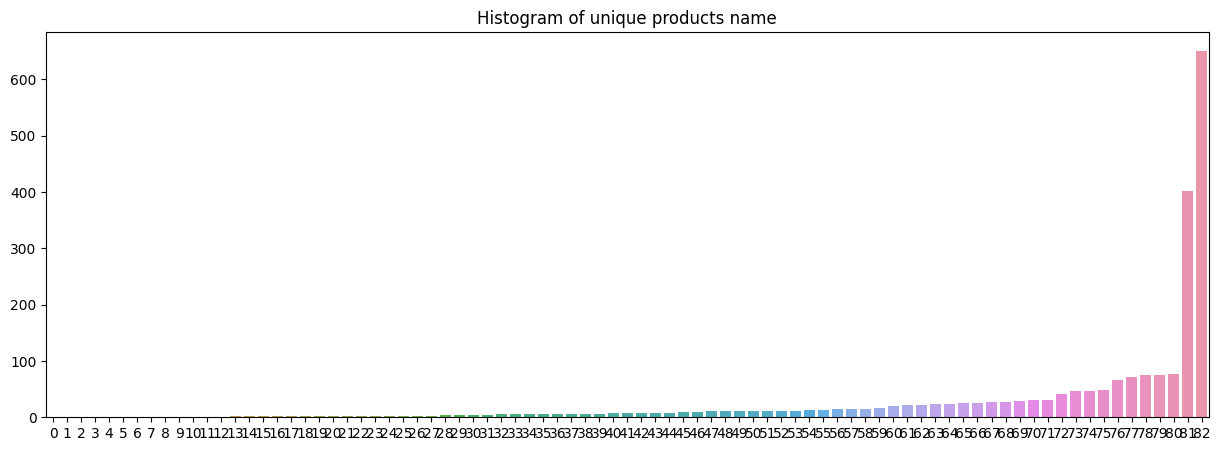

In [25]:
plt.figure(figsize=(15,5))
plt.title("Histogram of unique products name")
sns.barplot(x=list(pro_count.keys()),y=list(pro_count.values()))

### Task 1 : 품명과 물품규격명을 보고 제품특성정보소개 생성하기

In [26]:
dff = df.drop_duplicates(subset=["품명", "물품규격명"])
print(len(df)-len(dff))

1


In [27]:
task1 = []
INST = "다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오."
for i, row in tqdm(dff.iterrows()):
    name = ""
    name_list = row['물품규격명'].split(',')
    for n in name_list[1:-1]:
        name += f"{n}, "
    name += f"{name_list[-1]}."

    text = word_filtering(row["제품특성정보소개"])

    tmp_dict={}
    tmp_dict['instruction'] = INST
    tmp_dict['input'] = f"품명 : {row['품명']}.\n물품 규격명 :{name}"
    tmp_dict['output'] = f"입력된 정보를 토대로 생성한 제품 특성 정보는 {text} 입니다."
    task1.append(tmp_dict)

2241it [00:01, 1366.48it/s]


In [28]:
import numpy as np

In [29]:
samples = np.random.randint(low=0, high=2242, size=3)

In [30]:
print(np.array(task1)[samples][0]["input"])

품명 : 교량받침.
물품 규격명 : 매크로드,  EBC10000-235-G,  900×900×235mm,  10000kN,  일방향.


In [31]:
np.array(task1)[samples]

array([{'instruction': '다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.', 'input': '품명 : 교량받침.\n물품 규격명 : 매크로드,  EBC10000-235-G,  900×900×235mm,  10000kN,  일방향.', 'output': '입력된 정보를 토대로 생성한 제품 특성 정보는 탄성받침은 고무와 보강판의 적층으로 이루어져 있음, 교량구조물의 상부구조에 작용하는 하중을 하부구조에 전달하는 목적을 가진 교량받침의 일종으로 다른 받침보다 비교적 하중전달이 효율적이고 탄성변형에 대한 회전과 전단변형에 의한 이동이 자유로운 특징을 가지며 , 설치가 편하고 부식이 적어 설치 후 유지관리면에서도 경제적인 받침이다. 입니다.'},
       {'instruction': '다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.', 'input': '품명 : 압력용경질폴리염화비닐관.\n물품 규격명 : 고비,  AB-3P+ U40R,  Φ40mm×4m,  HIVP(삼중벽),  직관.', 'output': '입력된 정보를 토대로 생성한 제품 특성 정보는 삼중벽 구조의 수도관으로 내충격에 뛰어난 성능을 발휘합니다, 한층 업그레이드된 가공으로 뛰어난 저항력과 내구성으로 내외부에 부식이나 전해부식이 일어나지 않으며 무독안정제를 사용하였고 , 유해물질에 대한 우수한 저항력을 가지고 있습니다, 자체 개발된 실리카와 알미늄으로 이루어진 결정성 광물로 결정 내부에 작은 분자들이 드나들 수 있는 나노 세공들이 무수히 규칙적으로 뚫려있는 제올라이트 항균제 사용으로 강력한 항균효과를 발휘하며 박테리아 및 바이러스와 같은 미생물들을 99 % 이상 제거 하여 줍니다, 또한 최신 나노 기술의 비수용성 항균제를 사용하여 항균제가 씻겨 나가지 않고 제품 수명 기간 동안 영구적인 항균성이 유지 됩니다. 입니다.'},
       {'instruction': '다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.'

In [32]:
len(dff)

2241

### Task 2 : 물품 규격명과 제품특성정보소개를 보고 품명 생성하기

In [33]:
task2 = []
INST = "다음 제품의 물품 규격 명과 제품 특성 정보를 읽고, 제품의 이름을 생성하시오."
for i, row in tqdm(df.iterrows()):
    name = ""
    name_list = row['물품규격명'].split(',')
    for n in name_list[1:-1]:
        name += f"{n},"
    name += f"{name_list[-1]}"

    tmp_dict={}
    tmp_dict['instruction'] = INST
    tmp_dict['input'] = f"물품 규격 명 :{name}.\n제품 특성 정보 :\n{row['제품특성정보소개']}"
    tmp_dict['output'] = f"입력된 정보를 토대로 생성한 제품의 이름은 : {row['품명']} 입니다."
    task2.append(tmp_dict)

2242it [00:00, 10012.11it/s]


In [34]:
samples = np.random.randint(low=0, high=2242, size=10)

In [35]:
np.array(task2)[samples]

array([{'instruction': '다음 제품의 물품 규격 명과 제품 특성 정보를 읽고, 제품의 이름을 생성하시오.', 'input': '물품 규격 명 : 대경바스컴, SRI-818LB/LW, 2WAY, 100W, 8Ω.\n제품 특성 정보 :\n203.1mm 2WAY FULL RANGE SPEAKER     재질 : MDF 우드     출력 : 100W 8Ω     검정, 백색 2가지 종류', 'output': '입력된 정보를 토대로 생성한 제품의 이름은 : 스피커 입니다.'},
       {'instruction': '다음 제품의 물품 규격 명과 제품 특성 정보를 읽고, 제품의 이름을 생성하시오.', 'input': '물품 규격 명 : (부품)석천스틸그레이팅, sc0327, 1190×990×100mm, 받침.\n제품 특성 정보 :\n스틸그레이팅의 안정된 설치와 내구성을 위하여 거푸집시공시에 삽입되어 시공되며, 스틸그레이팅 받침으로 사용된다.', 'output': '입력된 정보를 토대로 생성한 제품의 이름은 : 스틸그레이팅 입니다.'},
       {'instruction': '다음 제품의 물품 규격 명과 제품 특성 정보를 읽고, 제품의 이름을 생성하시오.', 'input': '물품 규격 명 : 대경바스컴, TS-812RH, 스피커용.\n제품 특성 정보 :\nTSX-812LA LINE ARRAY 스피커를 고정하기 위한 브래킷\n* 재질 : 스틸\n* 용도 : 라인어레이플라잉브래킷\n* 무게 : 4.68 Kg\n* 허용하중 : 700 Kg\n* 크기 : 437 x 110 x 200 mm\n', 'output': '입력된 정보를 토대로 생성한 제품의 이름은 : 브래킷 입니다.'},
       {'instruction': '다음 제품의 물품 규격 명과 제품 특성 정보를 읽고, 제품의 이름을 생성하시오.', 'input': '물품 규격 명 : 매크로드, EBC550-71-F, 200×300×71mm, 550kN, 고정단.\n제품 특성 정보 :\n탄성받침은

In [36]:
idx = 5

In [37]:
print(np.array(task2)[samples][idx]["instruction"])
print(np.array(task2)[samples][idx]["input"])
print(np.array(task2)[samples][idx]["output"])

다음 제품의 물품 규격 명과 제품 특성 정보를 읽고, 제품의 이름을 생성하시오.
물품 규격 명 : 매크로드, EBC750-82-M, 200×400×82mm, 750kN, 양방향.
제품 특성 정보 :
탄성받침은 고무와 보강판의 적층으로 이루어져 있음. 교량구조물의 상부구조에 작용하는 하중을 하부구조에 전달하는 목적을 가진 교량받침의 일종으로 다른 받침보다 비교적 하중전달이 효율적이고 탄성변형에 대한 회전과 전단변형에 의한 이동이 자유로운 특징을 가지며, 설치가 편하고 부식이 적어 설치 후 유지관리면에서도 경제적인 받침이다
입력된 정보를 토대로 생성한 제품의 이름은 : 교량받침 입니다.


In [38]:
print(np.array(task1)[samples][idx]["instruction"])
print(np.array(task1)[samples][idx]["input"])
print(np.array(task1)[samples][idx]["output"])

다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.
품명 : 교량받침.
물품 규격명 : 매크로드,  EBC750-82-M,  200×400×82mm,  750kN,  양방향.
입력된 정보를 토대로 생성한 제품 특성 정보는 탄성받침은 고무와 보강판의 적층으로 이루어져 있음, 교량구조물의 상부구조에 작용하는 하중을 하부구조에 전달하는 목적을 가진 교량받침의 일종으로 다른 받침보다 비교적 하중전달이 효율적이고 탄성변형에 대한 회전과 전단변형에 의한 이동이 자유로운 특징을 가지며 , 설치가 편하고 부식이 적어 설치 후 유지관리면에서도 경제적인 받침이다 입니다.


In [39]:
task1_df = pd.DataFrame(task1)
task2_df = pd.DataFrame(task2)


task1_df['category']='task1'
task2_df['category']='task2'


task1_df['index']=task1_df.index
task2_df['index']=task2_df.index

appended_table = pd.concat([task1_df, task2_df], ignore_index=True)
appended_table['data'] = "spec_prod"

In [40]:
appended_table.head()

,instruction,input,output,category,index,data
0,"다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.","품명 : 인터랙티브화이트보드.\n물품 규격명 : 한국크레아, HCB-T22W, ...","입력된 정보를 토대로 생성한 제품 특성 정보는 구성품 : 교탁함체 , 54.6cm판...",task1,0,spec_prod
1,"다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.","품명 : 인터랙티브화이트보드.\n물품 규격명 : 한국크레아, HCB-22TW, ...","입력된 정보를 토대로 생성한 제품 특성 정보는 구성품 : 교탁함체 , 54.6cm판...",task1,1,spec_prod
2,"다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.","품명 : 인터랙티브화이트보드.\n물품 규격명 : 한국크레아, HKC-TMTWCRE...","입력된 정보를 토대로 생성한 제품 특성 정보는 구성품 : 교탁함체 , 54.6cm판...",task1,2,spec_prod
3,"다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.","품명 : 인터랙티브화이트보드.\n물품 규격명 : 한국크레아, HCB-T22WE, ...","입력된 정보를 토대로 생성한 제품 특성 정보는 구성품 : 교탁함체 , 54.6cm판...",task1,3,spec_prod
4,"다음 제품의 품명과 물품 규격명을 읽고, 제품 특성 정보를 생성하시오.","품명 : 인터랙티브화이트보드.\n물품 규격명 : 한국크레아, HCD-T22WEA,...","입력된 정보를 토대로 생성한 제품 특성 정보는 구성품 : 좌탁함체 , 54.6cm판...",task1,4,spec_prod


In [42]:
appended_table.to_csv(file_path + "/KISTI/dataset/specprod_task.csv")